In [151]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

In [152]:
#plot
def plotImages(images):
        _, ax = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
        for i in range(len(images)):
                ax[i].imshow(images[i], cmap='gray')
        plt.show()

# I - Carregar a imagem 'chips.png'.

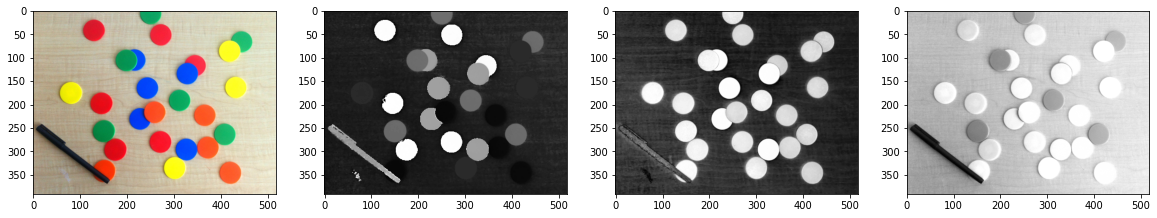

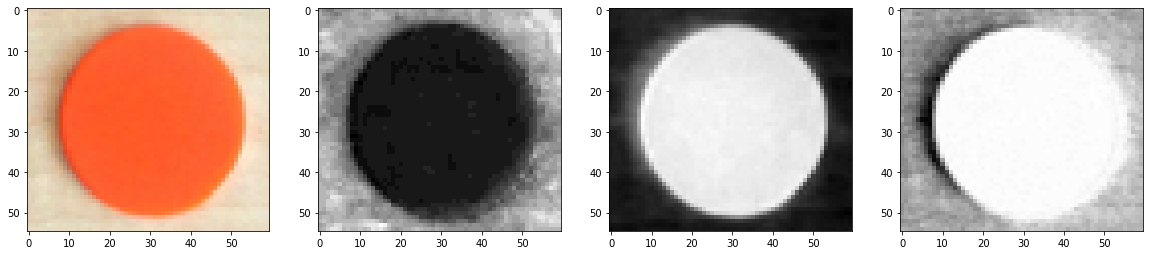

In [153]:
chips = cv2.imread("chips.png")
chips_crop = chips[318:373,390:450]

rgb_chips = cv2.cvtColor(chips, cv2.COLOR_BGR2RGB)
hsv_chips = cv2.cvtColor(chips, cv2.COLOR_BGR2HSV)

rgb_crop = cv2.cvtColor(chips_crop, cv2.COLOR_BGR2RGB)
hsv_crop = cv2.cvtColor(chips_crop, cv2.COLOR_BGR2HSV)

ch1, ch2, ch3 = cv2.split(hsv_chips)
cr1, cr2, cr3 = cv2.split(hsv_crop)

result_chips = [rgb_chips, ch1, ch2, ch3]
result_crop = [rgb_crop, cr1, cr2, cr3]

plotImages(result_chips)
plotImages(result_crop)


# II - Calcular o gradiente e mostrar uma imagem com os vetores sobrepostos à imagem 'chips.png', utilizando a função 'quiver'.

## Gradiente

In [154]:
ddepth = 3

In [155]:
direction_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
direction_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

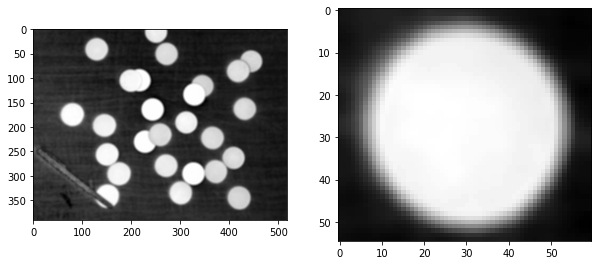

In [156]:
# Aplicando Blur para melhorar gradiente
kernel = np.ones((5,5),np.float32)/25
smoothing_chips = cv2.filter2D(ch2, ddepth, kernel)
smoothing_crop = cv2.filter2D(cr2, ddepth, kernel)

result = [smoothing_chips, smoothing_crop]
plotImages(result)

In [157]:
#imagem completa
grad_x_chips = cv2.Sobel(smoothing_chips, ddepth, 1, 0)
grad_y_chips = cv2.Sobel(smoothing_chips, ddepth, 0, 1)

grad_chips = np.abs(grad_x_chips) + np.abs(grad_y_chips)

#imagem crop
grad_x_crop = cv2.Sobel(smoothing_crop, ddepth, 1, 0)
grad_y_crop = cv2.Sobel(smoothing_crop, ddepth, 0, 1)

grad_crop = np.abs(grad_x_crop) + np.abs(grad_y_crop)

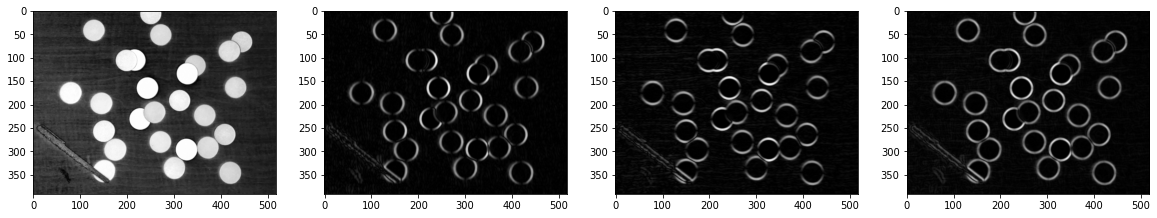

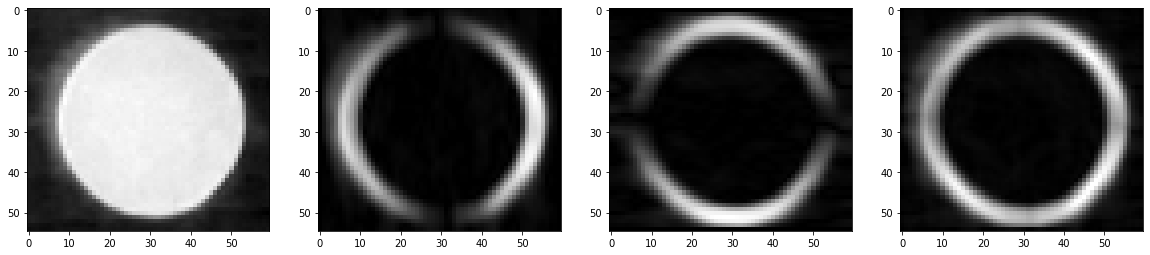

In [167]:
result_chips = [ch2, np.abs(grad_x_chips), np.abs(grad_y_chips), grad_chips]
result_crop = [cr2, np.abs(grad_x_crop), np.abs(grad_y_crop), grad_crop]

plotImages(result_chips)
plotImages(result_crop)

## Quiver

### Imagem Completa

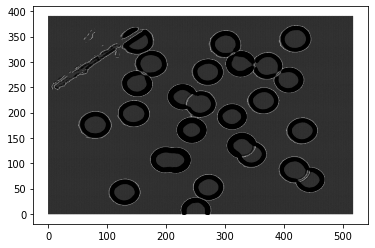

In [159]:
y_ch2, x_ch2 = ch2.shape 
x = np.arange(0, x_ch2, 1)
y = np.arange(0, y_ch2, 1)
X, Y = np.meshgrid(x, y)

plt.quiver(X, Y, grad_x_chips, grad_y_chips)

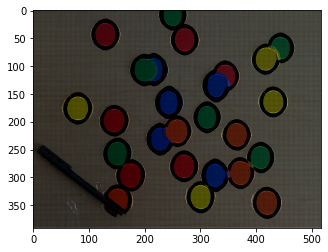

In [160]:
plt.quiver(X, Y, grad_x_chips, grad_y_chips)
plt.imshow(rgb_chips)    

### Imagem Crop

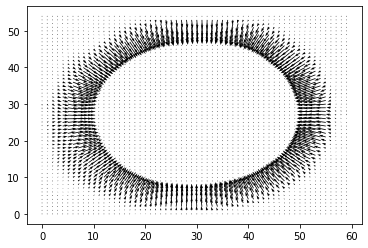

In [161]:
y_cr2, x_cr2 = cr2.shape
x = np.arange(0, x_cr2, 1)
y = np.arange(0, y_cr2, 1)
X, Y = np.meshgrid(x, y)

plt.quiver(X, Y, grad_x_crop, grad_y_crop)

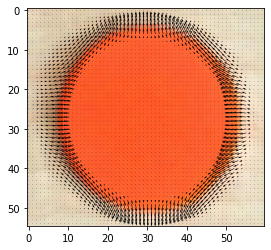

In [165]:
plt.quiver(X, Y, grad_x_crop, grad_y_crop)
plt.imshow(rgb_crop)  

# III - Obter a magnitude do gradiente e limiarizá-la.

MAGNITUDE


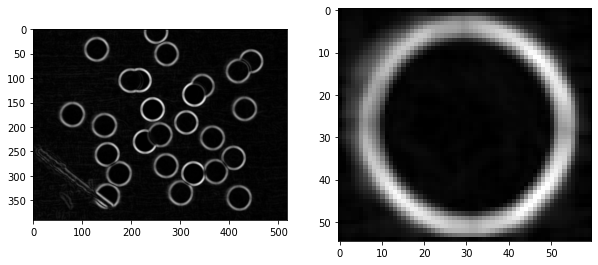


LIMIARIZAÇÃO


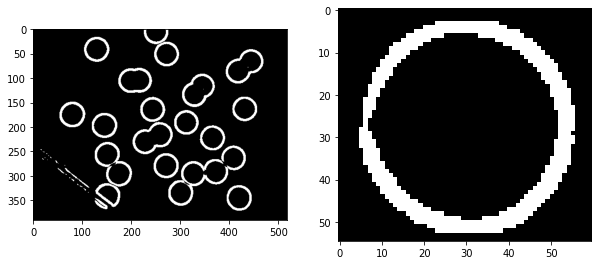

In [163]:
#Magnitude
images_magnitude = [grad_chips, grad_crop]

print("MAGNITUDE")
plotImages(images_magnitude)

#Limiarização
ret, thresh_chips = cv2.threshold(grad_chips, 150, 255, cv2.THRESH_BINARY)
ret, thresh_crop = cv2.threshold(grad_crop, 200, 255, cv2.THRESH_BINARY)
images_limiarizacao = [thresh_chips, thresh_crop]

print("\nLIMIARIZAÇÃO")
plotImages(images_limiarizacao)

# IV - Obter as bordas dos discos utilizando o algoritmo 'canny'.

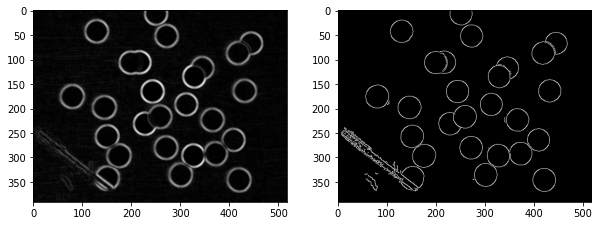

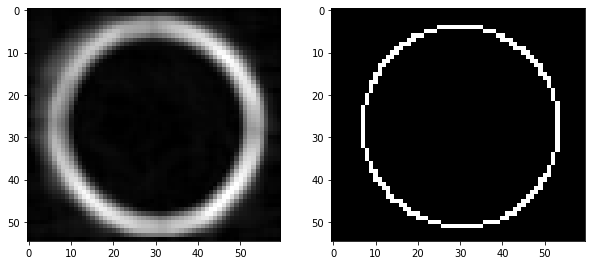

In [164]:
r1 = cv2.Canny(ch2, 100, 200)
r2 = cv2.Canny(cr2, 100, 200)

resultado1 = [grad_chips, r1]
resultado2 = [grad_crop, r2]
plotImages(resultado1)
plotImages(resultado2)